In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white",color_codes=True)

%matplotlib inline

In [2]:
data = pd.read_csv("Downloads/mlbootcamp5_train.csv")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
data['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [5]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.groupby(['gender', 'cholesterol'])['cardio'].aggregate('mean').unstack()

cholesterol,1,2,3
gender,,,
1,0.434555,0.584726,0.770920
2,0.450013,0.637635,0.753288


In [7]:
data.groupby(['gender', 'gluc'])['cardio'].aggregate('mean').unstack()

gluc,1,2,3
gender,,,
1,0.475995,0.581089,0.636563
2,0.489004,0.616122,0.590640


In [8]:
data.groupby(['smoke'])['cardio'].aggregate('mean')

smoke
0    0.502107
1    0.474793
Name: cardio, dtype: float64

In [9]:
data.groupby(['alco'])['cardio'].aggregate('mean')

alco
0    0.500574
1    0.484325
Name: cardio, dtype: float64

In [10]:
data['smoke_and_alco'] = data[['smoke', 'alco']].apply(lambda x: x[0]*x[1], 1)
data.groupby(['smoke_and_alco'])['cardio'].aggregate('mean')

smoke_and_alco
0    0.501203
1    0.444444
Name: cardio, dtype: float64

In [11]:
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,smoke_and_alco
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.002240
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,-0.036457
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,0.195139
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,0.110952
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.036482
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.000240
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.005402
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.004031
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,-0.007128
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,0.530571


Text(0, 0.5, 'weight')

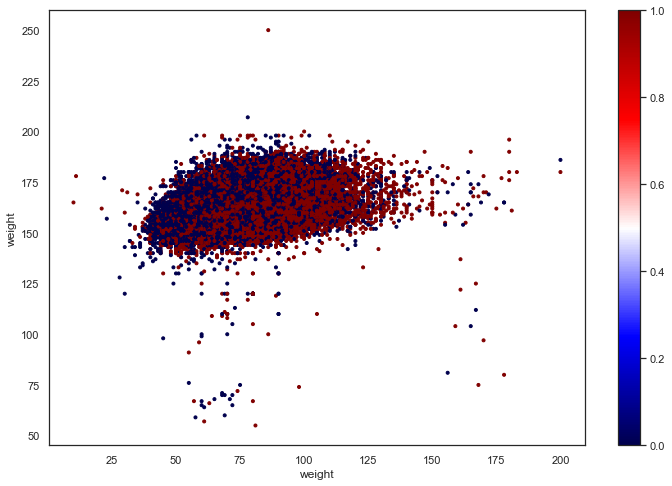

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(data.weight, data.height, s=9, c=data.cardio, cmap='seismic')
plt.colorbar()
plt.xlabel('weight')
plt.ylabel('weight')

Text(0, 0.5, 'ap_hi')

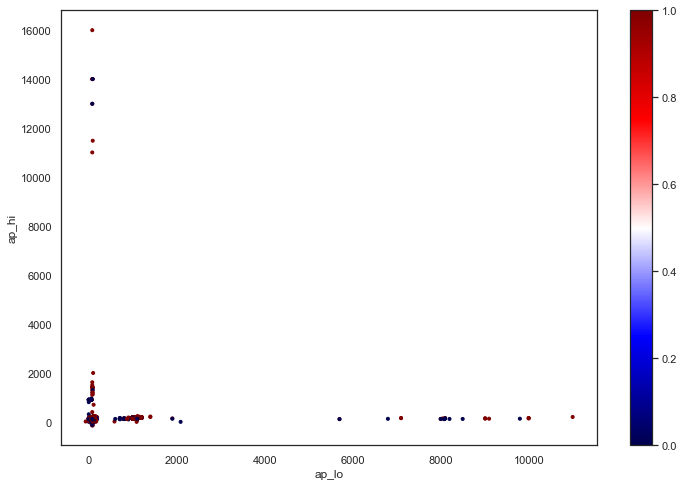

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(data.ap_lo, data.ap_hi, s=9, c=data.cardio, cmap='seismic')
plt.colorbar()
plt.xlabel('ap_lo')
plt.ylabel('ap_hi')

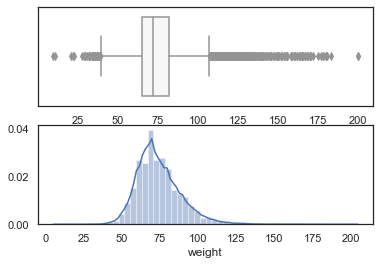

In [14]:
f, axes = plt.subplots(2, 1)

sns.boxplot(data.weight, palette="PRGn", ax=axes[0])
sns.distplot(data.weight, ax=axes[1])

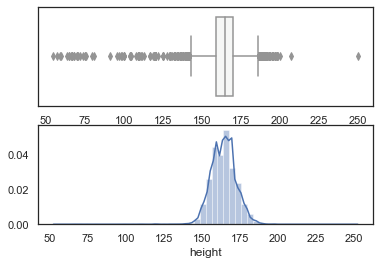

In [15]:
f, axes = plt.subplots(2, 1)

sns.boxplot(data.height, palette="PRGn", ax=axes[0])
sns.distplot(data.height, ax=axes[1])

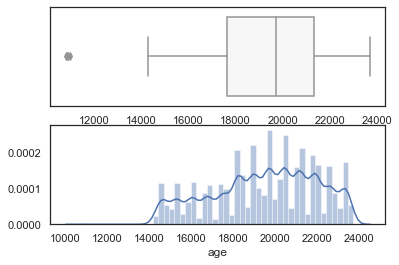

In [16]:
f, axes = plt.subplots(2, 1)

sns.boxplot(data.age, palette="PRGn", ax=axes[0])
sns.distplot(data.age, ax=axes[1])

In [17]:
mask = (data.ap_hi==1) & (data.ap_lo > 100)
data.loc[mask, 'ap_hi'] = (
    data.loc[mask,'ap_hi']*100 + (data.loc[mask, 'ap_lo']//100))
data.loc[mask,'ap_lo'] = (data.loc[mask, 'ap_lo'].mod(100)//10)*10
data.loc[data.ap_hi == 14900, 'ap_hi'] = 140
data.loc[data.ap_hi > 4000, 'ap_hi'] //=100
mask = (data.ap_lo == 0) & (data.ap_hi >= 300)
data.loc[data.ap_hi.isin([400, 401]), 'ap_hi'] = 140
data.loc[data.ap_hi == 701, 'ap_hi'] = 170
data.loc[data.ap_hi == 1420, 'ap_hi'] = 140
data.loc[data.ap_hi == 1620, 'ap_hi'] = 160
data.loc[data.ap_hi.isin([1130, 1110]), 'ap_hi'] = 110
data.loc[data.ap_hi == 960, 'ap_hi'] = 90
data.loc[data.ap_hi >= 300, 'ap_hi'] //= 10

data.loc[data.ap_lo == 4100, 'ap_lo'] = 140
data.loc[data.ap_lo == 10000, 'ap_lo'] = 100
data.loc[data.ap_lo == 5700, 'ap_lo'] = 75
data.loc[data.ap_lo == 6800, 'ap_lo'] = 80
data.loc[data.ap_lo == 4700, 'ap_lo'] = 70
data.loc[data.ap_lo == 1100, 'ap_lo'] = 110

data.loc[data.ap_lo >= 4000, 'ap_lo'] = (data.loc[data.ap_lo >= 4000, 'ap_lo']//1000)*10
data.loc[data.ap_lo == 1900, 'ap_lo'] = 90
data.loc[data.ap_lo == 1211, 'ap_lo'] = 120
data.loc[data.ap_lo >= 1200, 'ap_lo'] //= 10
data.loc[data.ap_lo >= 1100, 'ap_lo'] = (data.loc[data.ap_lo >= 1100, 'ap_lo']//100)*10
data.loc[data.ap_lo >= 1000, 'ap_lo'] = 100
data.loc[data.ap_lo == 570, 'ap_lo'] = 75
data.loc[data.ap_lo.isin([850, 585]), 'ap_lo'] = 85
data.loc[data.ap_lo >= 300, 'ap_lo'] = (data.loc[data.ap_lo >= 300, 'ap_lo']//100)*10

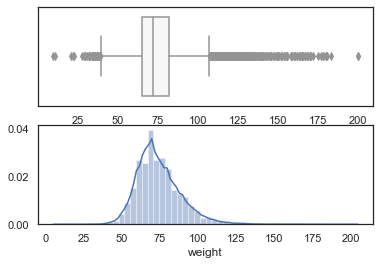

In [18]:
f, axes = plt.subplots(2, 1)

sns.boxplot(data.weight, palette="PRGn", ax=axes[0])
sns.distplot(data.weight, ax=axes[1])

In [19]:
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,smoke_and_alco
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.002421,-0.000038,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.002240
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.193907,0.149099,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,-0.036457
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.057884,0.065552,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,0.195139
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.015959,0.033794,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,0.110952
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.256467,0.248875,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.036482
ap_hi,0.002421,0.193907,0.057884,0.015959,0.256467,1.000000,0.652199,0.186007,0.087945,0.029026,0.031760,0.002612,0.402223,0.021391
ap_lo,-0.000038,0.149099,0.065552,0.033794,0.248875,0.652199,1.000000,0.156501,0.075226,0.025911,0.042443,0.000671,0.335350,0.022623
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.186007,0.156501,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.004031
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.087945,0.075226,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,-0.007128
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,0.029026,0.025911,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,0.530571


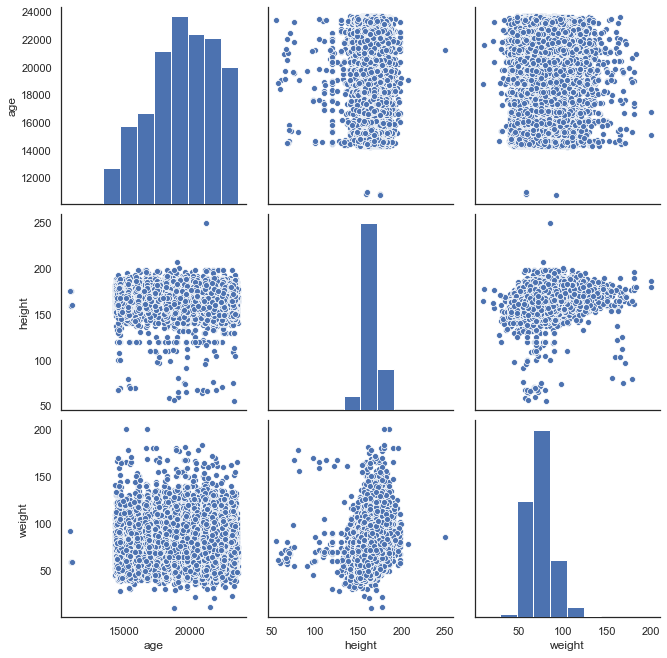

In [20]:
sns.pairplot(data[['age', 'height','weight']],size=3)

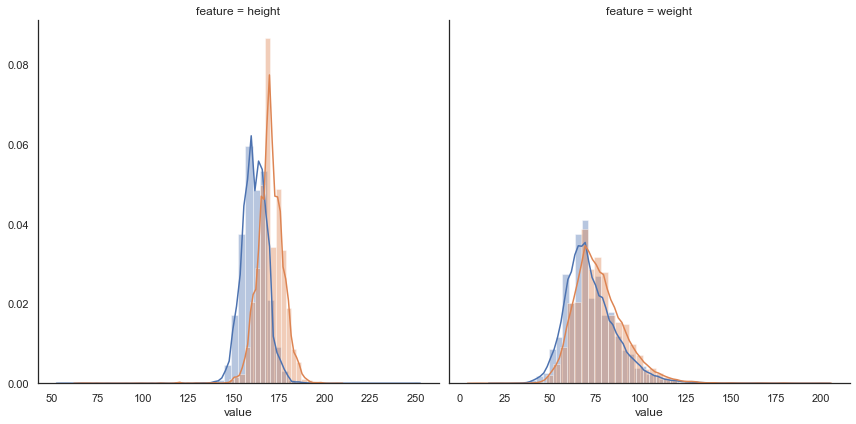

In [21]:
data_long = pd.melt(data[['height', 'weight', 'gender']], 'gender', var_name='feature')
g = sns.FacetGrid(data_long, col='feature', hue='gender', col_wrap=2,
                 sharex=False, size=6, legend_out=True)
g.map(sns.distplot, "value")

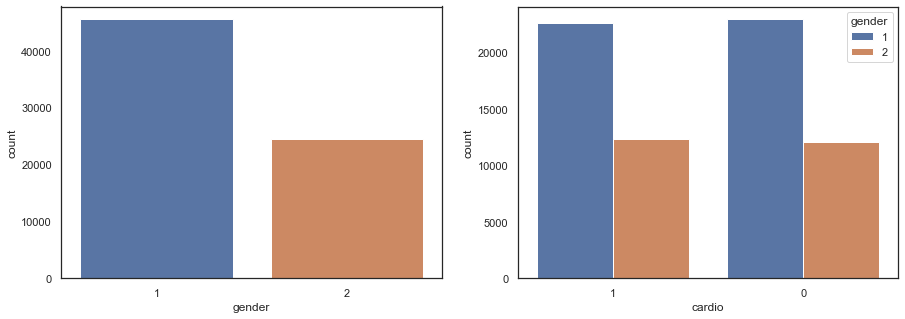

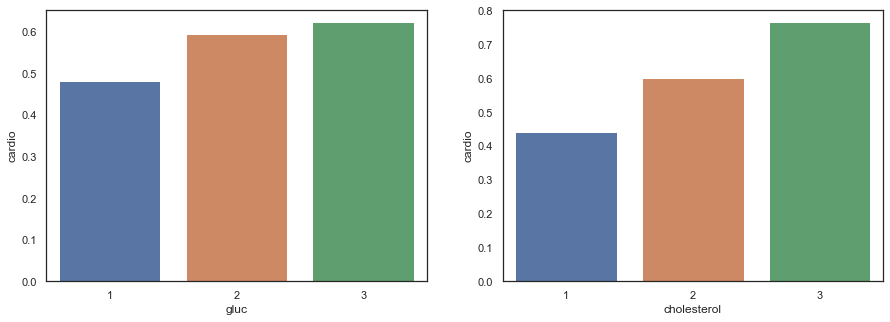

In [22]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
fig, (axis3,axis4) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='gender', data=data, ax=axis1)
sns.countplot(x='cardio',hue="gender", data=data,order=[1,0], ax=axis2)

data_gluc = data[["gluc", "cardio"]].groupby(['gluc'],as_index=False).mean()
sns.barplot(x='gluc', y='cardio', data=data_gluc, order=[1,2,3], ax=axis3)

data_gluc = data[["cholesterol", "cardio"]].groupby(['cholesterol'],as_index=False).mean()
sns.barplot(x='cholesterol', y='cardio', data=data_gluc, order=[1,2,3], ax=axis4)

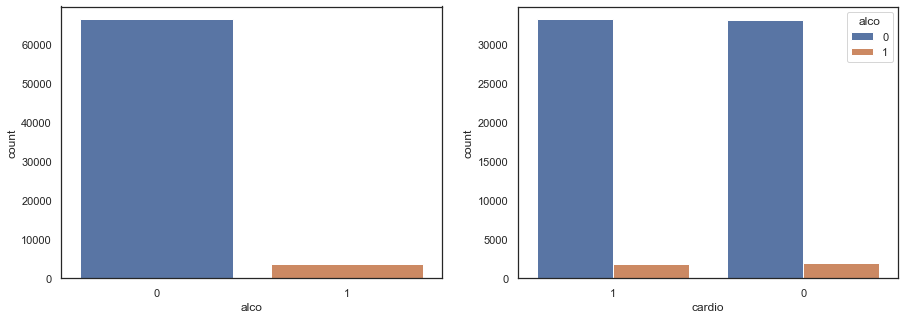

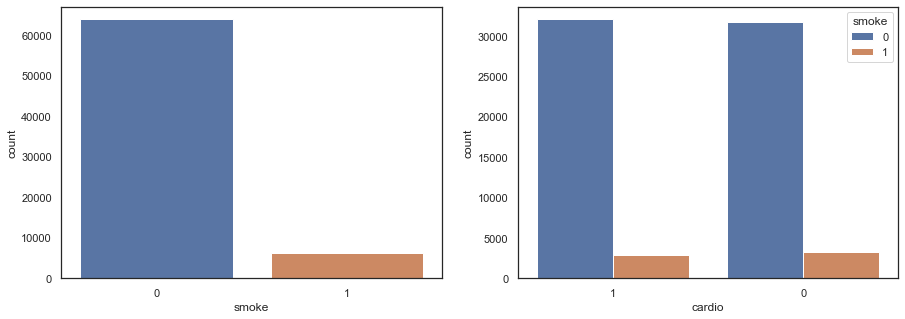

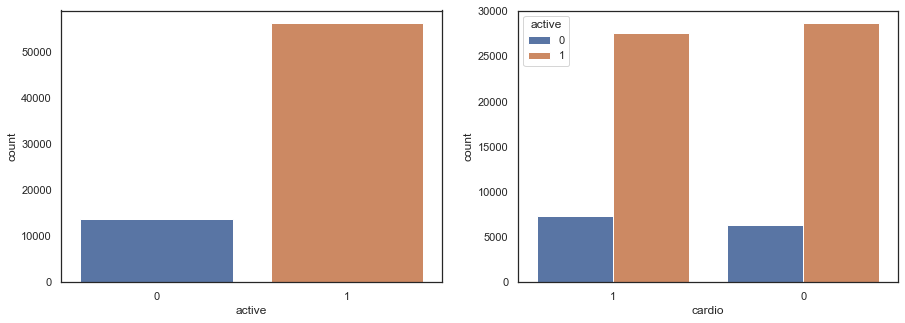

In [23]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='alco', data=data, ax=axis1)
sns.countplot(x='cardio',hue="alco", data=data, order=[1,0], ax=axis2)

fig, (axis3,axis4) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='smoke', data=data, ax=axis3)
sns.countplot(x='cardio',hue="smoke", data=data, order=[1,0], ax=axis4)

fig, (axis5,axis6) = plt.subplots(1,2,figsize=(15,5))


sns.countplot(x='active', data=data, ax=axis5)
sns.countplot(x='cardio',hue="active", data=data, order=[1,0], ax=axis6)

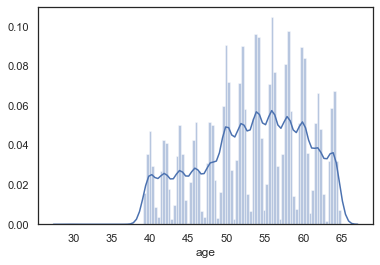

In [24]:
data['age'] = data['age']/365.25
sns.distplot(data['age'], label='Age', bins=100)

Text(0, 0.5, 'ap_hi')

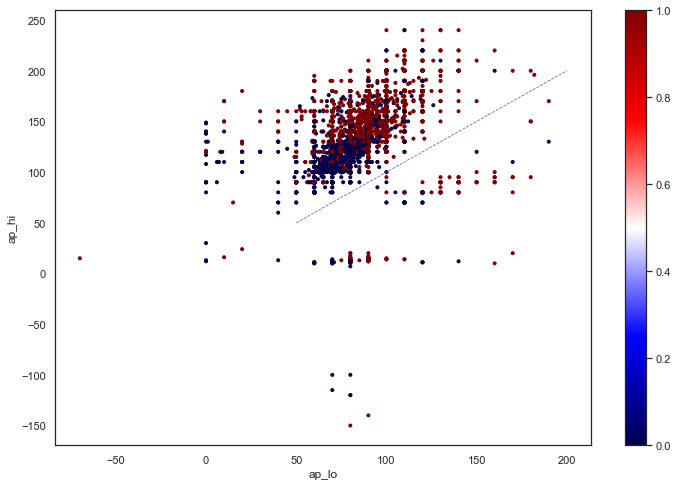

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(data.ap_lo, data.ap_hi, s=9,c=data.cardio, cmap='seismic')
plt.colorbar()
plt.plot([50,200],[50,200], '--', linewidth=0.8)
plt.xlabel('ap_lo')
plt.ylabel('ap_hi')

In [26]:
data['bmi'] = pd.qcut(data.weight/(data.height/100)**2, 25, labels=False)

data['ap_hi_ap_lo_diff'] = data['ap_hi'] - data['ap_lo']
 
data['ap_normal'] = ((data.ap_hi.between(85,125)) & (data.ap_lo.between(55, 85))).astype('int')

In [27]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,smoke_and_alco,bmi,ap_hi_ap_lo_diff,ap_normal
0,0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0,0,2,30,1
1,1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1,0,22,50,0
2,2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1,0,5,60,0
3,3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1,0,16,50,0
4,4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0,0,4,40,1


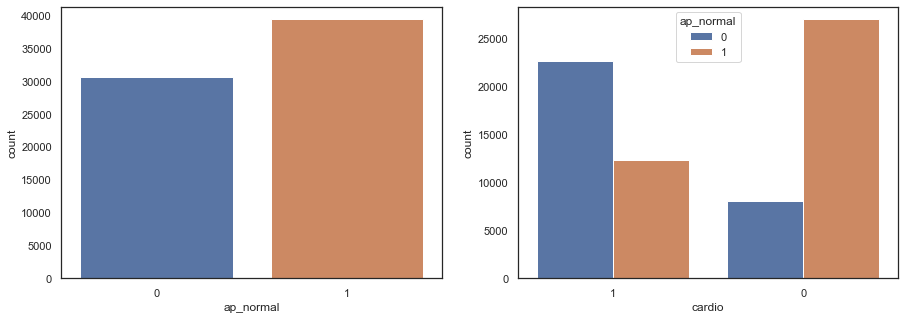

In [28]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='ap_normal', data=data, ax=axis1)
sns.countplot(x='cardio',hue="ap_normal", data=data, order=[1,0], ax=axis2)

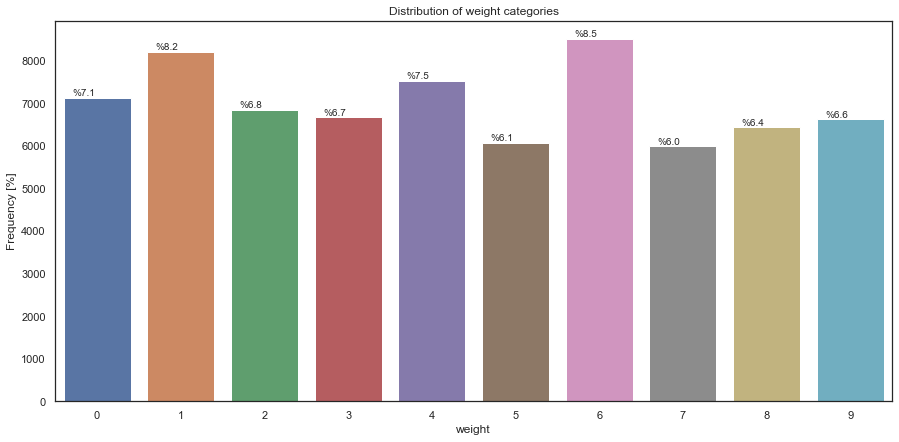

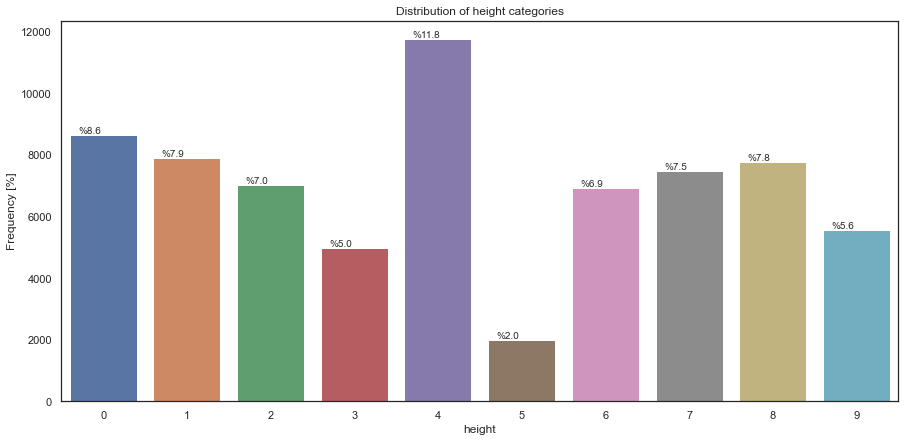

In [29]:
data.weight = pd.qcut(data.weight, 10, labels=False)
data.height = pd.qcut(data.height, 10, labels=False)


plt.figure(figsize=(15,7))
ax = sns.countplot(x="weight", data=data)
plt.title('Distribution of weight categories')
plt.xlabel('weight')
plt.ylabel('Frequency [%]')

for p in ax.patches:
    ax.annotate('%{:.1f}'.format(p.get_height()/1000.0), (p.get_x()+0.1, p.get_height()+50))
    
    
plt.figure(figsize=(15,7))
ax=sns.countplot(x="height", data=data)
plt.title('Distribution of height categories')
plt.xlabel('height')
plt.ylabel('Frequency [%]')
for p in ax.patches:
    ax.annotate('%{:.1f}'.format(p.get_height()/1000.0), (p.get_x()+0.1, p.get_height()+50))
       

In [30]:
heights = {'Vasia':182, 'Petia':168, 'Vlad':174, 'Sam':176, 'Tom': None, 'Oleg':184 }

In [31]:
df = pd.DataFrame.from_dict(heights, orient = "index")
df.columns = ['Height']
df

,Height
Vasia,182.0
Petia,168.0
Vlad,174.0
Sam,176.0
Tom,NaN
Oleg,184.0


In [38]:
weights = [56,78,None,45,77,98]

In [39]:
df['Weight'] = weights
df

,Height,Weight
Vasia,182.0,56.0
Petia,168.0,78.0
Vlad,174.0,NaN
Sam,176.0,45.0
Tom,NaN,77.0
Oleg,184.0,98.0


In [41]:
df['Weight'].fillna(np.mean(df['Weight']), inplace=True)
df['Height'].fillna(np.mean(df['Height']), inplace=True)

In [42]:
df

,Height,Weight
Vasia,182.0,56.0
Petia,168.0,78.0
Vlad,174.0,70.8
Sam,176.0,45.0
Tom,176.8,77.0
Oleg,184.0,98.0
